NEURAL NETWORK FOR THE UDDER TEMPERATURE

In [1]:
#importing dependencies
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

import keras
from sklearn.model_selection import train_test_split

Data preprocessing

In [2]:
#Data preprocessing
udder_temp = pd.read_csv('/content/uddertemperature.csv')
udder_temp.head()

,UdderSurfaceTemp,Status
0,28.94,Healthy
1,31.39,Healthy
2,30.41,Healthy
3,31.75,Healthy
4,33.09,Healthy


In [3]:
# Renaming some of the columns 
udder_temp = udder_temp.rename(columns={'Status':'target'})

In [4]:
#data cleaning
#removing null values
udder_temp = udder_temp.dropna()
udder_temp.isnull().sum()

UdderSurfaceTemp    0
target              0
dtype: int64

In [5]:
#check for missing values
missing_values = udder_temp.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/udder_temp.shape[0] # normalize
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [6]:
#replace the strings in target column with corresponding numbers
udder_temp =udder_temp.replace({'clinical': 2, 'subclinical': 1, 'Healthy': 0})
udder_temp.head()

,UdderSurfaceTemp,target
0,28.94,0
1,31.39,0
2,30.41,0
3,31.75,0
4,33.09,0


In [7]:
# checking the distribution of the target variable
udder_temp['target'].value_counts()

0    1079
1    1025
2    1020
Name: target, dtype: int64

'clinical': 2, 'subclinical': 1, 'Healthy': 0

Splitting the target and features

In [8]:
X = udder_temp.drop(columns='target',axis = 1)
y = udder_temp['target']

spliting data into testing and training data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2)

In [10]:
print(X.shape,X_train.shape,X_test.shape)

(3124, 1) (2499, 1) (625, 1)


In [11]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [12]:
print(X_train_std)

[[ 1.1787516 ]
 [-0.19236157]
 [-0.07898787]
 ...
 [-0.23841964]
 [ 1.14686524]
 [ 1.13269353]]


BUILDING A NUERAL NETWORK

In [13]:
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed (3)
from tensorflow import keras


In [14]:
from tensorflow.python.ops.math_ops import sigmoid
# setting up the layers of the nueral network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1,)),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(30,activation = 'relu'),
    keras.layers.Dense(3, activation = 'sigmoid')
])

In [15]:
#compiling the nueral network
model.compile(loss='sparse_categorical_crossentropy', 
               optimizer= 'adam', 
               metrics=['accuracy']
               )

Training the Nueral Network

In [16]:
history = model.fit(X_train_std,y_train, validation_split=0.1, epochs = 100)

Epoch 1/100
71/71 [==============================] - 3s 7ms/step - loss: 0.8066 - accuracy: 0.7332 - val_loss: 0.6357 - val_accuracy: 0.8120
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.9013 - val_loss: 0.3074 - val_accuracy: 0.9720
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9809 - val_loss: 0.1478 - val_accuracy: 0.9680
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 0.1149 - accuracy: 0.9787 - val_loss: 0.0979 - val_accuracy: 0.9680
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.9818 - val_loss: 0.0784 - val_accuracy: 0.9720
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9831 - val_loss: 0.0690 - val_accuracy: 0.9720
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9844 - val_loss: 0.0620 - val_accuracy: 0.9800
Epoch 8/100
7

VISUALISING ACCURACY AND LOSS

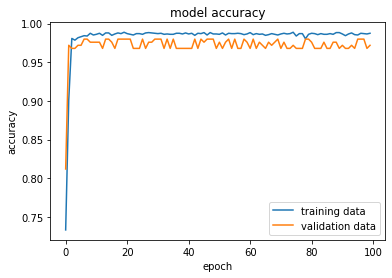

In [17]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','validation data'], loc ='lower right')

Accuracy of the model on test data

In [18]:
loss, accuracy = model.evaluate(X_test_std,y_test)
print(accuracy)

20/20 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9856
0.9855999946594238


In [19]:
#predictioon
y_pred = model.predict(X_test_std)
print(y_pred)

20/20 [==============================] - 0s 1ms/step
[[2.43524028e-06 3.35356385e-01 9.99984860e-01]
 [1.64359845e-02 9.95345294e-01 1.03384275e-02]
 [9.99974728e-01 1.01537490e-02 2.92126487e-07]
 ...
 [1.35702317e-06 2.77093083e-01 9.99993563e-01]
 [9.99969482e-01 1.15507152e-02 3.58454741e-07]
 [2.19423082e-02 9.95053232e-01 7.89369084e-03]]


In [20]:
#converting the prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 

BUILDING THE PREDICTIVE SYSTEM

In [21]:
input_temp = (34.5)
#converting the input data into a numpyarray 
input_udder_temp = np.asarray(input_temp)

#reshaping the numpy array
input_temp_reshaped = input_udder_temp.reshape(1,-1)
input_temp_reshaped.shape

(1, 1)

In [22]:
#standardizing the data 
input_temp_std = scaler.transform(input_temp_reshaped)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [23]:
prediction = model.predict(input_temp_std)

print(prediction)
prediction_label = [np.argmax(prediction)]
print(prediction_label)
if(prediction_label[0]==2):
    print("clinical Mastitis Detected")
  
elif (prediction_label[0]==1):
    print ("subclinical mastitis Detected")

else:
    print("Healthy animal and no mastitis Detected")

1/1 [==============================] - 0s 17ms/step
[[0.0072717  0.99607486 0.02189975]]
[1]
subclinical mastitis Detected


SAVING THE TRAINED MODEL

In [24]:
import pickle
filename = 'NNuddertemperature_model.pkl'
pickle.dump(model,open(filename,'wb'))